In [1]:
# Create folder
%mkdir download
%mkdir data
%mkdir processed_data

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘processed_data’: File exists


In [2]:
!pip install gdown

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)


  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached certifi-2024.12.14-py3-none-any.whl (164 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)
Using cached soupsieve-2.6-py3-none-any.whl (36 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)


In [3]:
# Download and extract
%mkdir download/isic2018
%cd download/isic2018
import gdown
# Tải dữ liệu
gdown.download('https://drive.google.com/uc?id=1-5G5YnR5sAXhxoYNoIxdM7iWveGHTMj9')
gdown.download('https://drive.google.com/uc?id=1-9FFXcwLwHJac6mpF2jhdxHTZFzLvVYA')
gdown.download('https://drive.google.com/uc?id=1VHMH4E41nDOieOGXbQ_eu13JfqXRDfZH')
gdown.download('https://drive.google.com/uc?id=1--HcNLfuBpxavAGHfCiPSR_XRXCV5NzO')
gdown.download('https://drive.google.com/uc?id=1-4i12Q7S9NKgitkW9Oy54WW1qOLOPN3R')
gdown.download('https://drive.google.com/uc?id=1JV2kD2iV5o3DTjQykDUF3PW0o5gZ5YJt')

/home/student02/hieu/Projects/SSSS/download/isic2018


Downloading...
From (original): https://drive.google.com/uc?id=1-5G5YnR5sAXhxoYNoIxdM7iWveGHTMj9
From (redirected): https://drive.google.com/uc?id=1-5G5YnR5sAXhxoYNoIxdM7iWveGHTMj9&confirm=t&uuid=9b46ac09-e247-41e9-b521-7798c34ed35f
To: /home/student02/hieu/Projects/SSSS/download/isic2018/test_dataset.zip
100%|██████████| 2.37G/2.37G [05:04<00:00, 7.79MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-9FFXcwLwHJac6mpF2jhdxHTZFzLvVYA
To: /home/student02/hieu/Projects/SSSS/download/isic2018/test_gt1.zip
100%|██████████| 9.68M/9.68M [00:00<00:00, 10.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1VHMH4E41nDOieOGXbQ_eu13JfqXRDfZH
From (redirected): https://drive.google.com/uc?id=1VHMH4E41nDOieOGXbQ_eu13JfqXRDfZH&confirm=t&uuid=2ed7393d-6cf0-4924-89f8-44c3ec516d97
To: /home/student02/hieu/Projects/SSSS/download/isic2018/train_gt1.zip
100%|██████████| 27.4M/27.4M [00:02<00:00, 10.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1--HcNLfuBp

'train_dataset.zip'

In [4]:
!unzip -q train_dataset.zip
!unzip -q val_dataset.zip
!unzip -q test_dataset.zip
!unzip -q train_gt1.zip
!unzip -q val_gt1.zip
!unzip -q test_gt1.zip

In [5]:
%mkdir images
%mkdir labels

# images folder
!mv ISIC2018_Task1-2_Training_Input/* images
!mv ISIC2018_Task1-2_Validation_Input/* images
!mv ISIC2018_Task1-2_Test_Input/* images

!rm -r ISIC2018_Task1-2_Training_Input/
!rm -r ISIC2018_Task1-2_Validation_Input/
!rm -r ISIC2018_Task1-2_Test_Input/

!rm images/ATTRIBUTION.txt

# labels folder
!mv ISIC2018_Task1_Training_GroundTruth/* labels
!mv ISIC2018_Task1_Validation_GroundTruth/* labels
!mv ISIC2018_Task1_Test_GroundTruth/* labels

!rm -r ISIC2018_Task1_Training_GroundTruth
!rm -r ISIC2018_Task1_Validation_GroundTruth
!rm -r ISIC2018_Task1_Test_GroundTruth

!rm labels/ATTRIBUTION.txt

%cd ../..

/home/student02/hieu/Projects/SSSS


In [6]:
%mkdir data/isic2018
!mv download/isic2018/images data/isic2018
!mv download/isic2018/labels data/isic2018

In [2]:
!pip install opencv-python
!pip install matplotlib
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def create_folds(proceeded_folder='./proceeded_data', num_folds=5):
    folds_dir = proceeded_folder
    os.makedirs(folds_dir, exist_ok=True)

    image_files = os.listdir(os.path.join(proceeded_folder, 'images'))
    label_files = os.listdir(os.path.join(proceeded_folder, 'labels'))

    assert all(img[:-4] == lbl[:-4] for img, lbl in zip(sorted(image_files), sorted(label_files))), "Image and label names do not match."

    file_names = [img[:-4] for img in image_files]

    random.shuffle(file_names)

    folds = np.array_split(file_names, num_folds)

    for i in range(num_folds):
        with open(os.path.join(folds_dir, f'fold{i + 1}.txt'), 'w') as f:
            for name in folds[i]:
                f.write(f"{name}.npy\n")
                
def save_images_and_labels_as_npy(images_dir, labels_dir, output_npy_dir):
    os.makedirs(output_npy_dir, exist_ok=True)

    # Create dataset directories
    dataset_image_dir = os.path.join(output_npy_dir, 'isic2018', 'images')
    dataset_label_dir = os.path.join(output_npy_dir, 'isic2018', 'labels')
    
    os.makedirs(dataset_image_dir, exist_ok=True)
    os.makedirs(dataset_label_dir, exist_ok=True)

    # Get list of image files
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.png') or f.endswith('.jpg')]
    image_files.sort()
    print("Total images found:", len(image_files))
    
    # Show first 5 samples
    plt.figure(figsize=(20,10))
    for i in range(min(5, len(image_files))):
        file = image_files[i]
        # Process image
        image_path = os.path.join(images_dir, file)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
        
        # Get corresponding label
        label_file = file.replace('.jpg', '_segmentation.png')
        label_path = os.path.join(labels_dir, label_file)
        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE) if os.path.exists(label_path) else None
        
        # Display image and mask side by side
        plt.subplot(2, 5, i+1)
        plt.imshow(image)
        plt.title(f'Image {i+1}')
        plt.axis('off')
        
        plt.subplot(2, 5, i+6)
        if label is not None:
            plt.imshow(label, cmap='gray')
            plt.title(f'Mask {i+1}')
        else:
            plt.title(f'No mask found')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Ask for confirmation
    user_input = input("Do the samples look correct? (yes/no): ")
    if user_input.lower() != 'yes':
        print("Process aborted by user")
        return
        
    for file in image_files:
        try:
            # Process image
            image_path = os.path.join(images_dir, file)
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            if image is not None:
                # Check image dimensions and channels
                if len(image.shape) != 3 or image.shape[2] != 3:
                    print(f"Warning: Image {file} does not have correct format (should be RGB)")
                    continue
                    
                # Resize image to 224x224
                image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
                image_npy_path = os.path.join(dataset_image_dir, f"{os.path.splitext(file)[0]}.npy")
                np.save(image_npy_path, image)
                print(f"Saved image to {image_npy_path}")
            else:
                print(f"Warning: Could not read image at {image_path}")
                continue
            
            file = file.replace('.jpg', '_segmentation.png')
            # Process label
            label_path = os.path.join(labels_dir, file)
            if os.path.exists(label_path):
                label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
                if label is not None:
                    # Check label dimensions
                    if len(label.shape) != 2:
                        print(f"Warning: Label {file} does not have correct format (should be grayscale)")
                        continue
                        
                    # Resize label to 224x224
                    label = cv2.resize(label, (224, 224), interpolation=cv2.INTER_NEAREST)
                    label_file = file.replace('_segmentation.png', '.npy')
                    label_npy_path = os.path.join(dataset_label_dir, label_file)
                    np.save(label_npy_path, label)
                    print(f"Saved label to {label_npy_path}")
                else:
                    print(f"Warning: Could not read label at {label_path}")
            else:
                print(f"Warning: Label not found for {file}")
                
        except Exception as e:
            print(f"Error processing {file}: {str(e)}")
            continue

  Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (62.5 MB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 7.7 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.3 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


Images directory content: ['ISIC_0014860.jpg', 'ISIC_0036118.jpg', 'ISIC_0008785.jpg', 'ISIC_0014585.jpg', 'ISIC_0013987.jpg', 'ISIC_0019312.jpg', 'ISIC_0021092.jpg', 'ISIC_0036222.jpg', 'ISIC_0014546.jpg', 'ISIC_0013208.jpg', 'ISIC_0015179.jpg', 'ISIC_0015071.jpg', 'ISIC_0000230.jpg', 'ISIC_0023301.jpg', 'ISIC_0012837.jpg', 'ISIC_0001367.jpg', 'ISIC_0013012.jpg', 'ISIC_0011402.jpg', 'ISIC_0022039.jpg', 'ISIC_0017406.jpg', 'ISIC_0014949.jpg', 'ISIC_0018989.jpg', 'ISIC_0016070.jpg', 'ISIC_0012699.jpg', 'ISIC_0020714.jpg', 'ISIC_0010339.jpg', 'ISIC_0002673.jpg', 'ISIC_0004110.jpg', 'ISIC_0013191.jpg', 'ISIC_0019544.jpg', 'ISIC_0011398.jpg', 'ISIC_0011230.jpg', 'ISIC_0016016.jpg', 'ISIC_0015568.jpg', 'ISIC_0017455.jpg', 'ISIC_0013988.jpg', 'ISIC_0012876.jpg', 'ISIC_0014948.jpg', 'ISIC_0012655.jpg', 'ISIC_0000556.jpg', 'ISIC_0009921.jpg', 'ISIC_0013224.jpg', 'ISIC_0013024.jpg', 'ISIC_0009972.jpg', 'ISIC_0012201.jpg', 'ISIC_0022574.jpg', 'ISIC_0000316.jpg', 'ISIC_0015013.jpg', 'ISIC_0036292

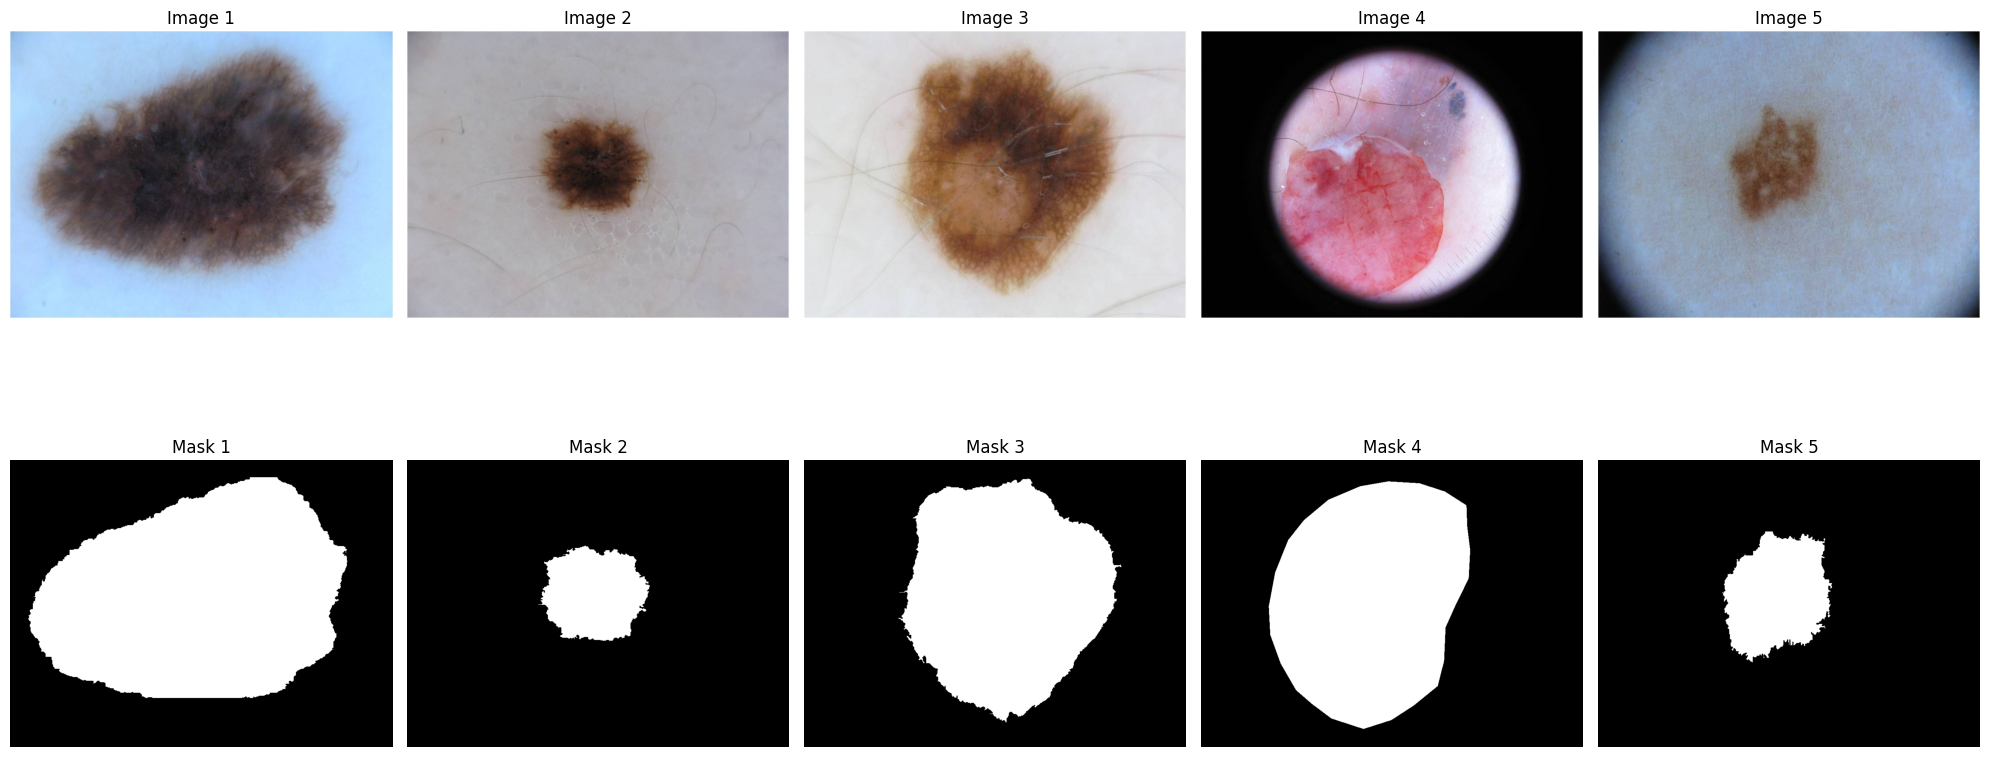

Saved image to data_processed/isic2018/images/ISIC_0000000.npy
Saved label to data_processed/isic2018/labels/ISIC_0000000.npy
Saved image to data_processed/isic2018/images/ISIC_0000001.npy
Saved label to data_processed/isic2018/labels/ISIC_0000001.npy
Saved image to data_processed/isic2018/images/ISIC_0000003.npy
Saved label to data_processed/isic2018/labels/ISIC_0000003.npy
Saved image to data_processed/isic2018/images/ISIC_0000004.npy
Saved label to data_processed/isic2018/labels/ISIC_0000004.npy
Saved image to data_processed/isic2018/images/ISIC_0000006.npy
Saved label to data_processed/isic2018/labels/ISIC_0000006.npy
Saved image to data_processed/isic2018/images/ISIC_0000007.npy
Saved label to data_processed/isic2018/labels/ISIC_0000007.npy
Saved image to data_processed/isic2018/images/ISIC_0000008.npy
Saved label to data_processed/isic2018/labels/ISIC_0000008.npy
Saved image to data_processed/isic2018/images/ISIC_0000009.npy
Saved label to data_processed/isic2018/labels/ISIC_0000

In [3]:
images_dirs = 'data/isic2018/images'
labels_dirs = 'data/isic2018/labels'
print("Images directory content:", os.listdir(images_dirs))
print("Labels directory content:", os.listdir(labels_dirs))

output_npy_dir = 'data_processed'
    
save_images_and_labels_as_npy(images_dirs, labels_dirs, output_npy_dir)
create_folds(proceeded_folder='data_processed/isic2018', num_folds=5)

In [1]:
import gdown
!gdown --id 1bS3Tnk73namGTGiaDW5b4m8IvD83ZlyK


/home/student02/anaconda3/envs/semi_env/lib/python3.13/site-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1bS3Tnk73namGTGiaDW5b4m8IvD83ZlyK
From (redirected): https://drive.google.com/uc?id=1bS3Tnk73namGTGiaDW5b4m8IvD83ZlyK&confirm=t&uuid=4e983dd6-32e3-4a0b-a60d-b391956161e3
To: /home/student02/hieu/Projects/SSSS/train.zip
100%|██████████████████████████████████████| 93.4M/93.4M [00:08<00:00, 11.2MB/s]


In [2]:
!unzip train.zip -d data/fugc

Archive:  train.zip
   creating: data/fugc/train/
  inflating: data/fugc/train/Data-sharing Agreement_FUGC2025.docx  
   creating: data/fugc/train/labeled_data/
   creating: data/fugc/train/labeled_data/images/
  inflating: data/fugc/train/labeled_data/images/0001.png  
  inflating: data/fugc/train/labeled_data/images/0002.png  
  inflating: data/fugc/train/labeled_data/images/0003.png  
  inflating: data/fugc/train/labeled_data/images/0004.png  
  inflating: data/fugc/train/labeled_data/images/0005.png  
  inflating: data/fugc/train/labeled_data/images/0006.png  
  inflating: data/fugc/train/labeled_data/images/0007.png  
  inflating: data/fugc/train/labeled_data/images/0008.png  
  inflating: data/fugc/train/labeled_data/images/0009.png  
  inflating: data/fugc/train/labeled_data/images/0010.png  
  inflating: data/fugc/train/labeled_data/images/0011.png  
  inflating: data/fugc/train/labeled_data/images/0012.png  
  inflating: data/fugc/train/labeled_data/images/0013.png  
  inflati

In [15]:
import os
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

def create_folds(proceeded_folder='./proceeded_data', num_folds=5):
    folds_dir = proceeded_folder
    os.makedirs(folds_dir, exist_ok=True)

    image_files = os.listdir(os.path.join(proceeded_folder, 'images'))
    label_files = os.listdir(os.path.join(proceeded_folder, 'labels'))

    assert all(img[:-4] == lbl[:-4] for img, lbl in zip(sorted(image_files), sorted(label_files))), "Image and label names do not match."

    file_names = [img[:-4] for img in image_files]

    random.shuffle(file_names)

    folds = np.array_split(file_names, num_folds)

    for i in range(num_folds):
        with open(os.path.join(folds_dir, f'fold_label_{i + 1}.txt'), 'w') as f:
            for name in folds[i]:
                f.write(f"{name}.npy\n")
                
def save_images_and_labels_as_npy(images_dirs, labels_dirs, output_npy_dir):
    for dataset_name, image_dir, label_dir in zip(['fugc'], images_dirs, labels_dirs):
        dataset_image_dir = os.path.join(output_npy_dir, dataset_name, 'train', 'labeled_data', 'images')
        dataset_label_dir = os.path.join(output_npy_dir, dataset_name, 'train', 'labeled_data', 'labels')
        
        os.makedirs(dataset_image_dir, exist_ok=True)
        os.makedirs(dataset_label_dir, exist_ok=True)

        for root, dirs, files in os.walk(image_dir):
            for file in files:
                if file.endswith('.png'):
                    image_path = os.path.join(root, file)
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    if image is not None:
                        image_npy_path = os.path.join(dataset_image_dir, f"{os.path.splitext(file)[0]}.npy")
                        np.save(image_npy_path, image)
                        print(f"Saved image to {image_npy_path}.")
                    else:
                        print(f"Warning: Could not read image at {image_path}.")

                    # Similarly for labels
                    label_path = os.path.join(label_dir, file)  # Assume labels have same filename
                    if os.path.exists(label_path):
                        label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
                        if label is not None:
                            label_npy_path = os.path.join(dataset_label_dir, f"{os.path.splitext(file)[0]}.npy")
                            np.save(label_npy_path, label)
                            print(f"Saved label to {label_npy_path}.")
                        else:
                            print(f"Warning: Could not read label at {label_path}.")
                    else:
                        print(f"Warning: Label not found for {file}.")

def save_unlabeled_images_as_npy(unlabeled_dirs, output_npy_dir):
    for dataset_name, unlabeled_dir in zip(['fugc'], unlabeled_dirs):
        dataset_unlabeled_dir = os.path.join(output_npy_dir, dataset_name, 'train', 'unlabeled_data', 'images')
        os.makedirs(dataset_unlabeled_dir, exist_ok=True)

        # Create unlabeled.txt file
        unlabeled_txt_path = os.path.join(output_npy_dir, dataset_name, 'train', 'unlabeled_data', 'unlabeled.txt')
        os.makedirs(os.path.dirname(unlabeled_txt_path), exist_ok=True)
        unlabeled_files = []

        for root, dirs, files in os.walk(unlabeled_dir):
            for file in files:
                if file.endswith('.png'):
                    image_path = os.path.join(root, file)
                    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
                    if image is not None:
                        image_npy_path = os.path.join(dataset_unlabeled_dir, f"{os.path.splitext(file)[0]}.npy")
                        np.save(image_npy_path, image)
                        print(f"Saved unlabeled image to {image_npy_path}.")
                        unlabeled_files.append(f"{os.path.splitext(file)[0]}.npy")
                    else:
                        print(f"Warning: Could not read unlabeled image at {image_path}.")

        # Write unlabeled file names to unlabeled.txt
        with open(unlabeled_txt_path, 'w') as f:
            for file in unlabeled_files:
                f.write(f"{file}\n")

images_dirs = 'data/fugc/train/labeled_data/images'
labels_dirs = 'data/fugc/train/labeled_data/labels'
unlabeled_dirs = 'data/fugc/train/unlabeled_data/images'

print("Images directory content:", os.listdir(images_dirs))
print("Labels directory content:", os.listdir(labels_dirs))

train_images_dirs = [
    '/home/student02/hieu/Projects/SSSS/data/fugc/train/labeled_data/images',    
]

train_labels_dirs = [
    '/home/student02/hieu/Projects/SSSS/data/fugc/train/labeled_data/labels',
]

unlabeled_images_dirs = [
    '/home/student02/hieu/Projects/SSSS/data/fugc/train/unlabeled_data/images',
]

output_npy_dir = '/home/student02/hieu/Projects/SSSS/data_processed'
    
save_images_and_labels_as_npy(train_images_dirs, train_labels_dirs, output_npy_dir)
save_unlabeled_images_as_npy(unlabeled_images_dirs, output_npy_dir)


Images directory content: ['0041.png', '0035.png', '0032.png', '0003.png', '0036.png', '0034.png', '0024.png', '0018.png', '0023.png', '0031.png', '0011.png', '0044.png', '0016.png', '0028.png', '0009.png', '0007.png', '0033.png', '0039.png', '0029.png', '0025.png', '0006.png', '0015.png', '0043.png', '0037.png', '0047.png', '0021.png', '0010.png', '0017.png', '0026.png', '0050.png', '0030.png', '0048.png', '0022.png', '0001.png', '0019.png', '0027.png', '0045.png', '0005.png', '0042.png', '0012.png', '0004.png', '0014.png', '0040.png', '0020.png', '0013.png', '0038.png', '0046.png', '0049.png', '0002.png', '0008.png']
Labels directory content: ['0041.png', '0035.png', '0032.png', '0003.png', '0036.png', '0034.png', '0024.png', '0018.png', '0023.png', '0031.png', '0011.png', '0044.png', '0016.png', '0028.png', '0009.png', '0007.png', '0033.png', '0039.png', '0029.png', '0025.png', '0006.png', '0015.png', '0043.png', '0037.png', '0047.png', '0021.png', '0010.png', '0017.png', '0026.png'

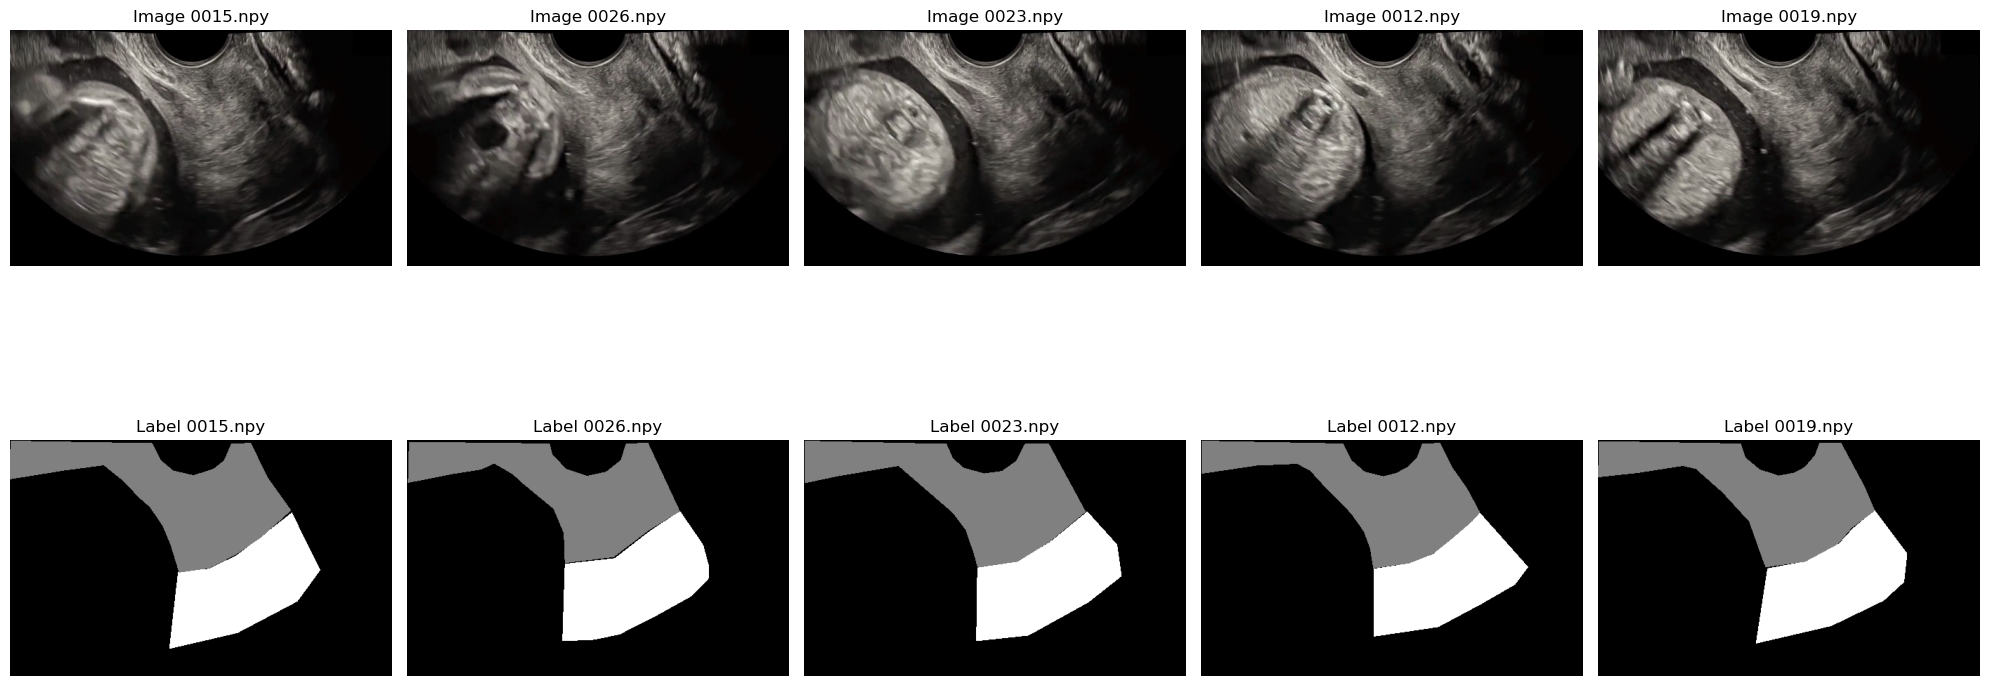

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
# show images and labels
dataset_name = 'fugc'
fold = 1

def show_images_and_labels(dataset_name, fold):
    dataset_image_dir = '/home/student02/hieu/Projects/SSSS/data_processed/fugc/train/labeled_data/images/'
    dataset_label_dir = '/home/student02/hieu/Projects/SSSS/data_processed/fugc/train/labeled_data/labels/'
    
    image_files = os.listdir(dataset_image_dir)
    label_files = os.listdir(dataset_label_dir)
    
    # Randomly select 5 images
    random_indices = np.random.choice(len(image_files), 5, replace=False)
    selected_image_files = [image_files[i] for i in random_indices]
    selected_label_files = [label_files[i] for i in random_indices]
    
    plt.figure(figsize=(20,10))
    for i, (image_file, label_file) in enumerate(zip(selected_image_files, selected_label_files)):
        image = np.load(os.path.join(dataset_image_dir, image_file))
        label = np.load(os.path.join(dataset_label_dir, label_file))
        
        plt.subplot(2, 5, i+1)
        plt.imshow(image)
        plt.title(f'Image {image_file}')
        plt.axis('off')
        
        plt.subplot(2, 5, i+6)
        plt.imshow(label, cmap='gray')
        plt.title(f'Label {label_file}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

show_images_and_labels(dataset_name, fold)